In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

In [ ]:

## Step 1: Load and Preprocess Data
# Define transformations for images
transform = transforms.Compose([
    transforms.ToTensor(),          # Convert images to tensors
    transforms.Normalize((0.5,), (0.5,))  # Normalize images
])


In [ ]:
train_dataset = torchvision.datasets.FashionMNIST(root="./data", train=True, transform=transform, download=True)
test_dataset = torchvision.datasets.FashionMNIST(root="./data", train=False, transform=transform, download=True)

100%|██████████| 26.4M/26.4M [00:01<00:00, 14.6MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 229kB/s]
100%|██████████| 4.42M/4.42M [00:01<00:00, 4.25MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 14.6MB/s]


In [ ]:
# Get the shape of the first image in the training dataset
image, label = train_dataset[0]
print(image.shape)
print(len(train_dataset))

torch.Size([1, 28, 28])
60000


In [ ]:
# Get the shape of the first image in the test dataset
image, label = test_dataset[0]
print(image.shape)
print(len(test_dataset))

torch.Size([1, 28, 28])
10000


In [ ]:
# Create DataLoader for batch processing
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [ ]:
class CNNClassifier(nn.Module):
    def __init__(self):
        super(CNNClassifier, self).__init__()
        # 1 input channel (grayscale), 2 convolution blocks + fully connected layers
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)  # (32,28,28)
        self.pool  = nn.MaxPool2d(2, 2)                          # halves size
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1) # (64,14,14)

        # After 2 conv + pool layers: feature map size = 64 x 7 x 7
        self.fc1   = nn.Linear(64 * 7 * 7, 128)
        self.fc2   = nn.Linear(128, 10)  # 10 classes in Fashion-MNIST

    def forward(self, x):
        x = torch.relu(self.conv1(x))
        x = self.pool(x)
        x = torch.relu(self.conv2(x))
        x = self.pool(x)
        x = x.view(x.size(0), -1)      # flatten
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)                # CrossEntropyLoss will apply Softmax
        return x

In [ ]:
from torchsummary import summary

# Initialize model
model = CNNClassifier()

# Move model to GPU if available
if torch.cuda.is_available():
    device = torch.device("cuda")
    model.to(device)

# Print model summary
print('Name: Mohanram Gunasekar')
print('Register Number: 212223240095')
summary(model, input_size=(1, 28, 28))

Name: Mohanram Gunasekar
Register Number: 212223240095
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 28, 28]             320
         MaxPool2d-2           [-1, 32, 14, 14]               0
            Conv2d-3           [-1, 64, 14, 14]          18,496
         MaxPool2d-4             [-1, 64, 7, 7]               0
            Linear-5                  [-1, 128]         401,536
            Linear-6                   [-1, 10]           1,290
Total params: 421,642
Trainable params: 421,642
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.36
Params size (MB): 1.61
Estimated Total Size (MB): 1.97
----------------------------------------------------------------


In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [ ]:
def train_model(model, train_loader, num_epochs=3):
    model.train()
    for epoch in range(num_epochs):
        running_loss = 0.0
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

        print('Name: Mohanram Gunasekar')
        print('Register Number: 212223240095')
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}')

In [ ]:
# Train the model
train_model(model, train_loader)

Name: Mohanram Gunasekar
Register Number: 212223240095
Epoch [1/3], Loss: 0.4010
Name: Mohanram Gunasekar
Register Number: 212223240095
Epoch [2/3], Loss: 0.2584
Name: Mohanram Gunasekar
Register Number: 212223240095
Epoch [3/3], Loss: 0.2109


In [ ]:
## Step 4: Test the Model
def test_model(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for images, labels in test_loader:
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    accuracy = correct / total
    print('Name: Mohanram Gunasekar')
    print('Register Number: 212223240095')
    print(f'Test Accuracy: {accuracy:.4f}')

    # Compute confusion matrix
    cm = confusion_matrix(all_labels, all_preds)
    plt.figure(figsize=(8, 6))
    print('Name: Mohanram Gunasekar')
    print('Register Number: 212223240095')
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_dataset.classes, yticklabels=test_dataset.classes)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

    # Print classification report
    print('Name: Mohanram Gunasekar')
    print('Register Number: 212223240095')
    print("Classification Report:")
    print(classification_report(all_labels, all_preds, target_names=test_dataset.classes))

Name: Mohanram Gunasekar
Register Number: 212223240095
Test Accuracy: 0.9086
Name: Mohanram Gunasekar
Register Number: 212223240095


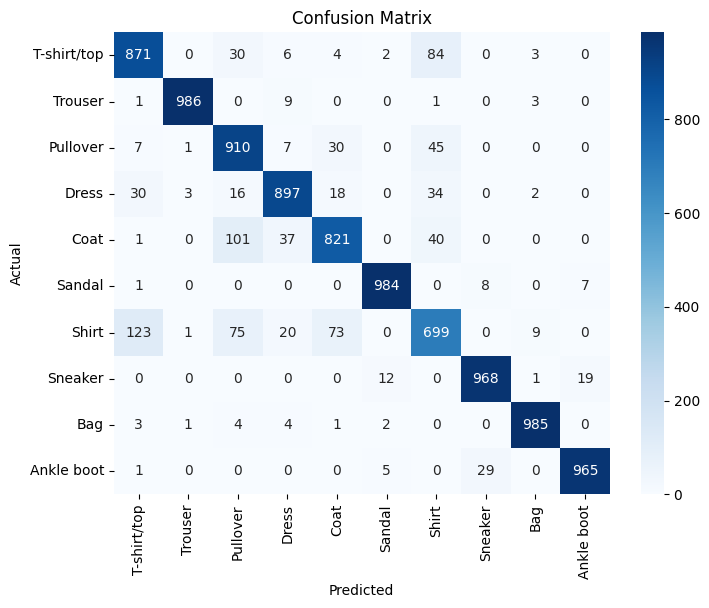

Name: Mohanram Gunasekar
Register Number: 212223240095
Classification Report:
              precision    recall  f1-score   support

 T-shirt/top       0.84      0.87      0.85      1000
     Trouser       0.99      0.99      0.99      1000
    Pullover       0.80      0.91      0.85      1000
       Dress       0.92      0.90      0.91      1000
        Coat       0.87      0.82      0.84      1000
      Sandal       0.98      0.98      0.98      1000
       Shirt       0.77      0.70      0.73      1000
     Sneaker       0.96      0.97      0.97      1000
         Bag       0.98      0.98      0.98      1000
  Ankle boot       0.97      0.96      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



In [ ]:
# Evaluate the model
test_model(model, test_loader)

In [ ]:
## Step 5: Predict on a Single Image
import matplotlib.pyplot as plt
def predict_image(model, image_index, dataset):
    model.eval()
    image, label = dataset[image_index]
    with torch.no_grad():
        output = model(image.unsqueeze(0))  # Add batch dimension
        _, predicted = torch.max(output, 1)
    class_names = dataset.classes

    # Display the image
    print('Name: Mohanram Gunasekar')
    print('Register Number: 212223240095')
    plt.imshow(image.squeeze(), cmap="gray")
    plt.title(f'Actual: {class_names[label]}\nPredicted: {class_names[predicted.item()]}')
    plt.axis("off")
    plt.show()
    print(f'Actual: {class_names[label]}, Predicted: {class_names[predicted.item()]}')

Name: Mohanram Gunasekar
Register Number: 212223240095


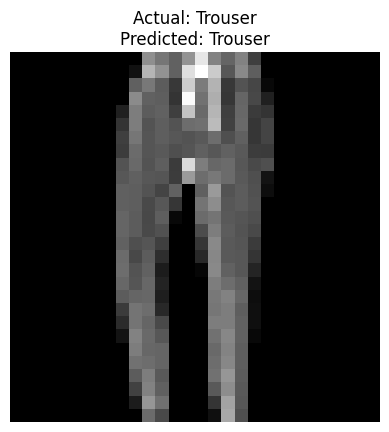

Actual: Trouser, Predicted: Trouser


In [ ]:
# Example Prediction
predict_image(model, image_index=80, dataset=test_dataset)